# Explatory Data Analysis & Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import recall_score, confusion_matrix, f1_score

In [3]:
# import data into a pandas dataframe
df = pd.read_csv("vertebral_column_data.csv", encoding="utf-8", sep=',')
df

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [4]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# # Encode categorical labels
# df["Class"] = LabelEncoder().fit_transform(df["Class"])  # Converts 'AB' to 0, 'Normal' to 1, etc.
df["Class"] = df["Class"].map({'NO': 0, 'AB': 1})

Missing Values:
 Pelvic Incidence              0
Pelvic Tilt                   0
Lumbar Lordosis Angle         0
Sacral Slope                  0
Pelvic Radius                 0
Grade of Spondylolisthesis    0
Class                         0
dtype: int64


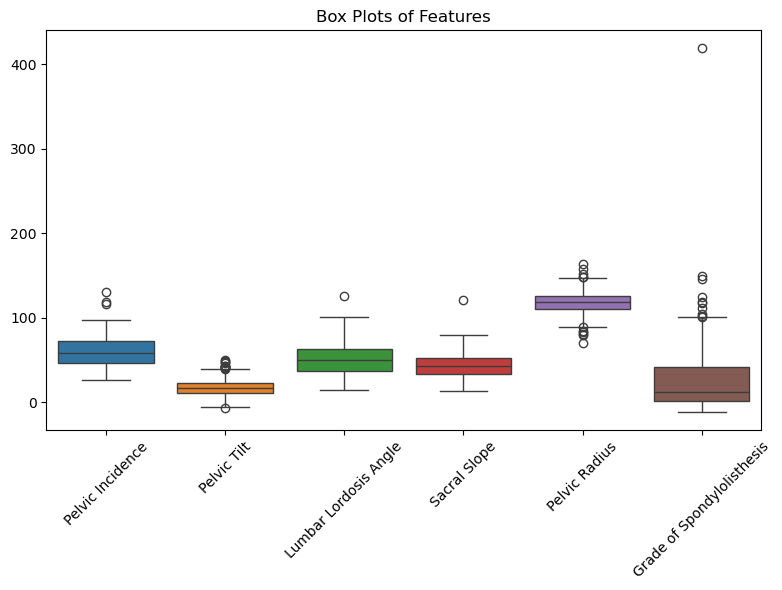

In [5]:
# Create box plots for each feature
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.drop(columns=["Class"]))
plt.xticks(rotation=45)
plt.title("Box Plots of Features")
plt.tight_layout()
plt.show()

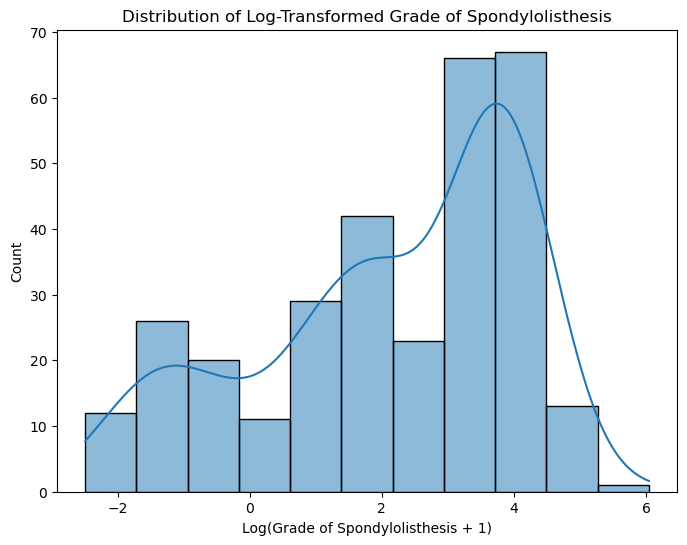

In [6]:
# Apply log transformation
df['Grade of Spondylolisthesis'] = np.sign(df['Grade of Spondylolisthesis']) * np.log1p(abs(df['Grade of Spondylolisthesis']))  # log(1+x) to avoid log(0) issue
df['Grade of Spondylolisthesis']

# Create plot to visualize the transformed feature
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Grade of Spondylolisthesis", kde=True)
plt.title("Distribution of Log-Transformed Grade of Spondylolisthesis")
plt.xlabel("Log(Grade of Spondylolisthesis + 1)")
plt.ylabel("Count")
plt.show()

In [7]:
Q1 = df.drop(columns=["Class"]).quantile(0.25)
Q3 = df.drop(columns=["Class"]).quantile(0.75)
IQR = Q3 - Q1

# Define valid range for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask to filter out outliers
outlier_mask = ~((df.drop(columns=["Class"]) < lower_bound) | (df.drop(columns=["Class"]) > upper_bound)).any(axis=1)

# Apply mask to remove outliers from both features and target
df = df[outlier_mask].reset_index(drop=True)
df

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.223144,1
1,39.06,10.06,25.02,29.00,114.41,1.715598,1
2,68.83,22.22,50.09,46.61,105.99,-1.510722,1
3,69.30,24.65,44.31,44.64,101.87,2.502255,1
4,49.71,9.65,28.32,40.06,108.17,2.188296,1
...,...,...,...,...,...,...,...
279,47.90,13.62,36.00,34.29,117.45,-1.658228,0
280,53.94,20.72,29.22,33.22,114.37,-0.350657,0
281,61.45,22.69,46.17,38.75,125.67,-1.311032,0
282,45.25,8.69,41.58,36.56,118.55,0.190620,0


In [8]:
df

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.223144,1
1,39.06,10.06,25.02,29.00,114.41,1.715598,1
2,68.83,22.22,50.09,46.61,105.99,-1.510722,1
3,69.30,24.65,44.31,44.64,101.87,2.502255,1
4,49.71,9.65,28.32,40.06,108.17,2.188296,1
...,...,...,...,...,...,...,...
279,47.90,13.62,36.00,34.29,117.45,-1.658228,0
280,53.94,20.72,29.22,33.22,114.37,-0.350657,0
281,61.45,22.69,46.17,38.75,125.67,-1.311032,0
282,45.25,8.69,41.58,36.56,118.55,0.190620,0


In [9]:
skewness = df["Grade of Spondylolisthesis"].skew()
print(f"Skewness of Grade of Spondylolisthesis: {skewness:.3f}")

Skewness of Grade of Spondylolisthesis: -0.612


In [10]:
# Normalize numerical features (optional, but helps for some models)
scaler = StandardScaler()
features = df.columns[:-1]  # All except the Class column
df[features] = scaler.fit_transform(df[features])

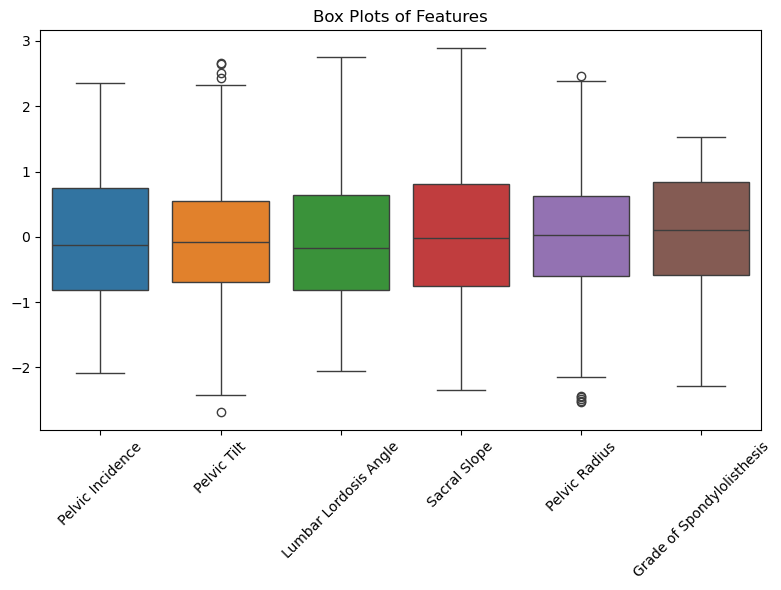

In [11]:
# Create box plots for each feature
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.drop(columns=["Class"]))
plt.xticks(rotation=45)
plt.title("Box Plots of Features")
plt.tight_layout()
plt.show()

In [12]:
df.describe()

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis,Class
count,2.840000e+02,2.840000e+02,284.000000,2.840000e+02,2.840000e+02,2.840000e+02,284.000000
mean,-2.501911e-16,-3.502675e-16,0.000000,2.627007e-16,3.002293e-16,-1.501147e-16,0.651408
std,1.001765e+00,1.001765e+00,1.001765,1.001765e+00,1.001765e+00,1.001765e+00,0.477366
min,-2.089297e+00,-2.674782e+00,-2.047278,-2.351521e+00,-2.522097e+00,-2.288244e+00,0.000000
25%,-8.108119e-01,-6.986434e-01,-0.812507,-7.512432e-01,-5.937269e-01,-5.766209e-01,0.000000
50%,-1.296257e-01,-7.319983e-02,-0.164035,-2.424429e-02,2.318579e-02,1.041031e-01,1.000000
75%,7.425134e-01,5.489566e-01,0.644375,8.110140e-01,6.259241e-01,8.435127e-01,1.000000
max,2.357965e+00,2.656280e+00,2.757207,2.884952e+00,2.463796e+00,1.527176e+00,1.000000


# Supervized Clustering (SVM)

In [14]:
# Split data
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
def run_svm(kernel='rbf', C=0.1, gamma='scale', random_state=42):
    svm_model = SVC(kernel=kernel, C=C, gamma=gamma, random_state=random_state)

    # Perform 5-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_recall = cross_val_score(svm_model, X_train, y_train, cv=cv, scoring='recall_weighted')

    svm_model.fit(X_train, y_train)
    
    return cv_recall, svm_model

# Run SVM model and get cross-validation results
cv_recall, svm_model = run_svm()

# Print cross-validation performance
print("\n5-Fold Cross-Validation Results:")
print(f"Mean Recall Score: {cv_recall.mean():.4f}")

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Print test set performance
print("\nPerformance on Test Set:")
print(f"Recall (Class 1): {recall_score(y_test, y_pred, average='binary'):.4f}")
print(f"Recall (Weighted-Averaged): {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score (Weighted-Averaged): {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


5-Fold Cross-Validation Results:
Mean Recall Score: 0.8064

Performance on Test Set:
Recall (Class 1): 0.9189
Recall (Weighted-Averaged): 0.8070
F1-Score (Weighted-Averaged): 0.7993
Confusion Matrix:
 [[12  8]
 [ 3 34]]


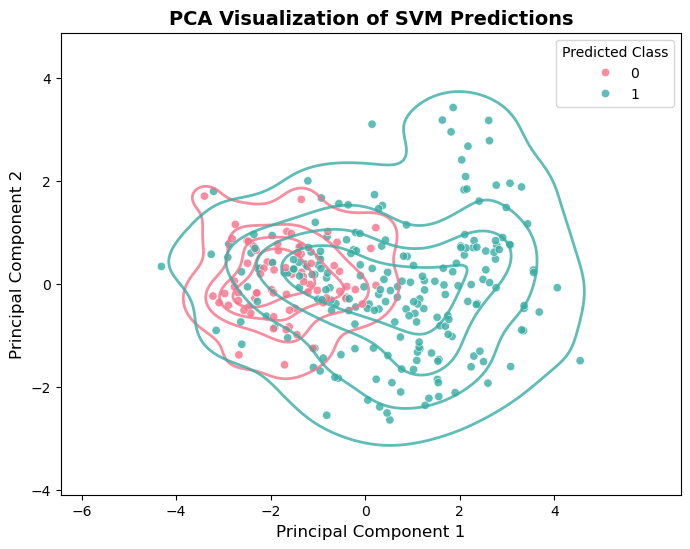

In [16]:
def visualize_pca(X_pca, y_pred):
    df_plot = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
    df_plot['Predicted Class'] = y_pred

    class_colors = sns.color_palette("husl", len(np.unique(y_pred)))

    plt.figure(figsize=(8, 6))
    ax = sns.scatterplot(x='PCA1', y='PCA2', hue='Predicted Class', data=df_plot, palette=class_colors, alpha=0.8)

    for i, cls in enumerate(np.unique(y_pred)):
        class_data = df_plot[df_plot['Predicted Class'] == cls][['PCA1', 'PCA2']]
        if len(class_data) > 1: 
            sns.kdeplot(x=class_data['PCA1'], y=class_data['PCA2'], 
                        levels=5, color=class_colors[i], linewidths=2, alpha=0.8, ax=ax)

    plt.xticks(np.arange(int(df_plot['PCA1'].min()) - 2, int(df_plot['PCA1'].max()) + 2, 2))
    plt.yticks(np.arange(int(df_plot['PCA2'].min()) - 2, int(df_plot['PCA2'].max()) + 2, 2))


    plt.title("PCA Visualization of SVM Predictions", fontsize=14, fontweight='bold')
    plt.xlabel("Principal Component 1", fontsize=12)
    plt.ylabel("Principal Component 2", fontsize=12)
    plt.legend(title="Predicted Class", fontsize=10, loc="upper right", frameon=True)
    plt.show()

# Predictions on the whole dataset (not just a test set)
y_pred = svm_model.predict(X)

# Apply PCA to the whole dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

visualize_pca(X_pca, y_pred)

# Supervized Clustering (KNN)

In [18]:
def run_knn(n_neighbors=None):
    if n_neighbors is None:
        
        n_neighbors = [1, 3, 5, 7, 9, 11]

    param_grid = {'n_neighbors': n_neighbors}  

    knn = KNeighborsClassifier()
    
    # Perform 5-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='recall_weighted', n_jobs=-1, verbose=1)

    grid_search.fit(X_train, y_train)

    return grid_search

grid_search = run_knn()

# Display the best parameters and best CV score
print("\nBest Hyperparameters for KNN:", grid_search.best_params_)
print(f"Best Cross-Validation Recall Score: {grid_search.best_score_:.4f}")

# Get the best model from Grid Search
best_knn = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn.predict(X_test)

# Print test set performance
print("\nPerformance on Test Set:")
print(f"Recall (Weighted-Average): {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall (Binary Class 1): {recall_score(y_test, y_pred, average='binary'):.4f}")
print(f"F1-Score (Weighted-Average): {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best Hyperparameters for KNN: {'n_neighbors': 11}
Best Cross-Validation Recall Score: 0.8281

Performance on Test Set:
Recall (Weighted-Average): 0.7895
Recall (Binary Class 1): 0.8649
F1-Score (Weighted-Average): 0.7867
Confusion Matrix:
 [[13  7]
 [ 5 32]]


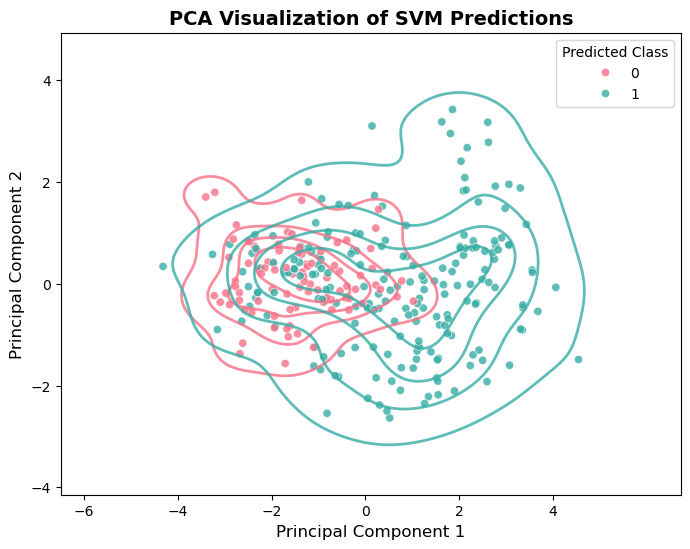

In [19]:
y_pred = best_knn.predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

visualize_pca(X_pca, y_pred)

# Unsupervized Clustering (Kernel K-means Clustering)

## Kernel K-means Algorithm

In [22]:
# Exract true lables (AB → 1, NO → 0) and assign it to a new variable (true_labels_numeric)
true_labels_numeric = df["Class"].values  # AB → 1, NO → 0

In [23]:
# Import SpectralClustering to perform kernel k-means
from sklearn.cluster import SpectralClustering
# Import silhouette_score to generate silhouette scores to evaluate the performance
from sklearn.metrics import silhouette_score

# Define a function to run the kernel k-means method
def run_kernel_kmeans_alt(X, n_clusters=2, gamma=0.1, random_state=42):
    """
    Runs Kernel K-Means clustering using Spectral Clustering.
    
    Parameters:
    - X: NumPy array or Pandas DataFrame (preprocessed feature matrix)
    - n_clusters: Number of clusters (default: 2)
    - gamma: Kernel coefficient for RBF (default: 0.1)
    - random_state: Random seed for reproducibility (default: 42)
    
    Returns:
    - cluster_labels: Array of cluster assignments for each sample
    - silhouette: Silhouette score indicating clustering quality
    """
    # Approximate Kernel K-Means using Spectral Clustering with nearest_neighbors affinity
    model = SpectralClustering(n_clusters=n_clusters, # no. of clusters (2 in this case)
                               affinity="nearest_neighbors", # Type of affinity (e.g., "rbf" or "nearest_neighbors")
                               n_neighbors=10, # Number of neighbors (used only if affinity is "nearest_neighbors")
                               assign_labels="discretize", # Method for assigning labels after clustering (e.g., "kmeans" or "discretize")
                               gamma=gamma, # Kernel coefficient
                               random_state=random_state, # Random seed for reproducibility
                               n_init=5 # Number of initializations to run before selecting the best clustering result
                              )
    
    # Fit and predict clusters and assign it to cluster_labels
    cluster_labels = model.fit_predict(X)

    # Compute silhouette score for evaluation and assign it to silhouette
    silhouette = silhouette_score(X, cluster_labels)

    return cluster_labels, silhouette

In [24]:
# Extract numerics only in the dataset and assign it to an array X
X = df.drop(columns=["Class"]).select_dtypes(include=['number']).values

# Run kernel k-means method using the function above with X
cluster_labels, silhouette = run_kernel_kmeans_alt(X, n_clusters=2, gamma=0.5)

# Get the result of the clustering and Silhouette
print("Predicted Cluster Labels:", cluster_labels)
print(f"Silhouette Score: {silhouette:.4f}")

Predicted Cluster Labels: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
Silhouette Score: 0.3422


In [25]:
## Run the Kernel K-means without "Pelvic Incidence"
# Extract numerics only in the dataset and assign it to an array X2
X2 = df.drop(columns=["Pelvic Incidence", "Class"]).select_dtypes(include=['number']).values

# Run kernel k-means method using the function above with X2
cluster_labels2, silhouette2 = run_kernel_kmeans_alt(X2, n_clusters=2, gamma=0.5)

# Get the result of the clustering and Silhouette
print("Predicted Cluster Labels:", cluster_labels2)
print(f"Silhouette Score: {silhouette2:.4f}")

Predicted Cluster Labels: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
Silhouette Score: 0.3183


## Performance Evaluation

In [27]:
# Import linear_sum_assignment and accuracy_score to compute the accuracy of the clustering
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import accuracy_score

# define a function to compute accuracy against the original cluster labeling 
def compute_clustering_accuracy(true_labels, predicted_labels):
    """
    Computes accuracy between true labels and predicted cluster assignments.
    
    Parameters:
    - true_labels: Actual class labels
    - predicted_labels: Cluster assignments from Kernel K-Means
    
    Returns:
    - accuracy: Adjusted clustering accuracy
    """
    # Get unique label mappings of the original true clustering lables
    true_classes = np.unique(true_labels)
    # Get unique label mappings of the model-predicted clustering lables
    predicted_clusters = np.unique(predicted_labels)
    
    # Create confusion matrix with true lables and predicted lables
    contingency_matrix = np.zeros((len(true_classes), len(predicted_clusters)), dtype=int)
    for i, true_label in enumerate(true_classes):
        for j, cluster_label in enumerate(predicted_clusters):
            contingency_matrix[i, j] = np.sum((true_labels == true_label) & (predicted_labels == cluster_label))
    
    # Solve the assignment problem using Hungarian Algorithm
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)  # Maximization problem
    
    # Compute accuracy based on best mapping obtained from the contingency matrix
    best_mapping = {predicted_clusters[j]: true_classes[i] for i, j in zip(row_ind, col_ind)}
    mapped_preds = np.array([best_mapping[label] for label in predicted_labels])
    
    return accuracy_score(true_labels, mapped_preds)

In [28]:
# Import classification_report and confusion_matrix to compute F1 and recall scores
from sklearn.metrics import classification_report, confusion_matrix

# Define a function to compute F1 and recall scores 
def compute_f1_recall(true_labels, predicted_labels):

    # Compute Confusion Matrix and Classification Report with the true labels and predicted labels
    conf_matrix = confusion_matrix(true_labels_numeric, predicted_labels)
    class_report = classification_report(true_labels_numeric, predicted_labels, output_dict=True)

    # Extract and print F1 and Recall scores for each class
    f1_weighted_avg = class_report["weighted avg"]["f1-score"] # Weighted F1
    recall_class0 = class_report["0"]["recall"]  # Recall for class 0
    recall_class1 = class_report["1"]["recall"]  # Recall for class 1
    recall_weighted_avg = class_report["weighted avg"]["recall"]  # Weighted Recall

    return class_report, f1_weighted_avg, recall_class0, recall_class1, recall_weighted_avg

In [29]:
# Compute accuracy using the above function with true and predicted labels
accuracy = compute_clustering_accuracy(true_labels_numeric, cluster_labels)
print(f"Clustering Accuracy: {accuracy:.4f}")

# Compute F1 and Recall scores using the above function with true and predicted labels
class_report, f1_weighted_avg, recall_class0, recall_class1, recall_weighted_avg = compute_f1_recall(true_labels_numeric, cluster_labels)

# Get the obtained scores
print(f"Weighted F1-score: {f1_weighted_avg:.4f}")  # Weighted F1-score
print(f"Weighted Recall: {recall_weighted_avg:.4f}")  # Weighted Recall
print(f"Class1 Recall: {recall_class1:.4f}")  # Weighted Recall

Clustering Accuracy: 0.7113
Weighted F1-score: 0.7160
Weighted Recall: 0.7113
Class1 Recall: 0.6000


In [30]:
# Compute accuracy using the above function with true and predicted labels (dataset w/o Pelvic Incidence)
accuracy2 = compute_clustering_accuracy(true_labels_numeric, cluster_labels2)
print(f"Clustering Accuracy: {accuracy2:.4f}")

# Compute F1 and Recall scores using the above function with true and predicted labels (dataset w/o Pelvic Incidence)
class_report2, f1_weighted_avg2, recall_class02, recall_class12, recall_weighted_avg2 = compute_f1_recall(true_labels_numeric, cluster_labels2)

# Get the obtained scores
print(f"Weighted F1-score: {f1_weighted_avg2:.4f}")  # Weighted F1-score
print(f"Weighted Recall: {recall_weighted_avg2:2.4f}")  # Weighted Recall
print(f"Class1 Recall: {recall_class12:.4f}")  # Weighted Recall

Clustering Accuracy: 0.7359
Weighted F1-score: 0.7412
Weighted Recall: 0.7359
Class1 Recall: 0.6378


## Grid-search the hyperparameters

In [32]:
# Import product
from itertools import product

# Define a function to grid search the optimal hyperparameters of the model
def tune_spectral_clustering(X, true_labels):
    """
    Performs a comprehensive grid search for the best hyperparameters in Spectral Clustering using F1-score.

    Parameters:
    - X: NumPy array, the feature matrix.
    - true_labels: Actual ground truth labels.

    Returns:
    - best_params: Dictionary containing the best hyperparameters and F1-score.
    """

    # Define the range of hyperparameters to test
    param_grid = {
        "n_clusters": [2],  # Number of clusters
        "affinity": ["nearest_neighbors", "rbf"],  # Similarity computation method
        "n_neighbors": [10, 30, 50],  # Number of neighbors (for nearest_neighbors affinity)
        "assign_labels": ["kmeans", "discretize"],  # Label assignment method
        "gamma": [0.01, 0.1, 0.5, 1.0, 2.0],  # RBF Kernel Gamma values
        "random_state": [42],  # Set random state for reproducibility
        "n_init": [5, 10]  # Number of initializations
    }

    # Generate all possible combinations of hyperparameters
    param_combinations = list(product(*param_grid.values()))

    best_score = -1
    best_params = {}

    # Perform grid search
    for params in param_combinations:
        # Unpack the parameter combination
        n_clusters, affinity, n_neighbors, assign_labels, gamma, random_state, n_init = params

        # Skip invalid combinations (n_neighbors is only applicable for "nearest_neighbors" affinity)
        if affinity != "nearest_neighbors" and n_neighbors != 10:
            continue

        # Initialize and fit Spectral Clustering model
        model = SpectralClustering(
            n_clusters=n_clusters,
            affinity=affinity,
            n_neighbors=n_neighbors if affinity == "nearest_neighbors" else 50,
            assign_labels=assign_labels,
            gamma=gamma if affinity == "rbf" else 0.1,
            random_state=random_state,
            n_init=n_init
        )

        # fit the model with X and assign it to cluster_labels
        cluster_labels = model.fit_predict(X)

        # Compute the F1 and recall scores
        class_report, f1_weighted_avg, recall_class0, recall_class1, recall_weighted_avg = compute_f1_recall(true_labels, cluster_labels)

        # Update the best parameters if the current F1-score is better
        if f1_weighted_avg > best_score:
            best_score = f1_weighted_avg
            best_params = {
                "n_clusters": n_clusters,
                "affinity": affinity,
                "n_neighbors": n_neighbors if affinity == "nearest_neighbors" else 50,
                "assign_labels": assign_labels,
                "gamma": gamma if affinity == "rbf" else 0.1,
                "random_state": random_state,
                "n_init": n_init,
                "f1_score": f1_weighted_avg
            }

    return best_params

In [33]:
# Run hyperparameter tuning using the above function with X against true labels
best_params = tune_spectral_clustering(X, true_labels_numeric)

# Print best parameters
print("\nBest Hyperparameters:")
print(best_params)


Best Hyperparameters:
{'n_clusters': 2, 'affinity': 'nearest_neighbors', 'n_neighbors': 10, 'assign_labels': 'discretize', 'gamma': 0.1, 'random_state': 42, 'n_init': 5, 'f1_score': 0.7160164936990363}


In [34]:
# Run hyperparameter tuning using the above function with X2 against true labels (dataset w/o Pelvic Incidence)
best_params2 = tune_spectral_clustering(X2, true_labels_numeric)

# Print best parameters (dataset w/o Pelvic Incidence)
print("\nBest Hyperparameters:")
print(best_params2)


Best Hyperparameters:
{'n_clusters': 2, 'affinity': 'nearest_neighbors', 'n_neighbors': 10, 'assign_labels': 'discretize', 'gamma': 0.1, 'random_state': 42, 'n_init': 5, 'f1_score': 0.7411788785435725}


# Unsupervized Clustering (Model-Based Clustering (Gaussian Mixture Model; GMM))

## Model-Based Clustering (EM) Algorithm

In [37]:
# import the package to run EM algorithm
from sklearn.mixture import GaussianMixture

# define a function to run EM algorithm
def run_em_gmm(X, n_components=2, covariance_type="tied", random_state=42):
    """
    Runs Expectation-Maximization (EM) algorithm using Gaussian Mixture Model (GMM).
    
    Parameters:
    - X: NumPy array or Pandas DataFrame (preprocessed feature matrix)
    - n_components: Number of clusters (default: 2)
    - covariance_type: Type of covariance matrix ('full', 'tied', 'diag', 'spherical')
    - random_state: Random seed for reproducibility
    
    Returns:
    - cluster_labels: Cluster assignments for each sample
    - gmm: Fitted GMM model
    - silhouette: Silhouette score for cluster evaluation
    """
    # Initialize and fit Gaussian Mixture Model (GMM)
    gmm = GaussianMixture(n_components=n_components, # Number of clusters (Gaussian components)
                          covariance_type=covariance_type, # Type of covariance matrix ("full", "tied", "diag", or "spherical")
                          random_state=random_state, # Random seed for reproducibility
                          max_iter=500, # Maximum number of EM iterations
                          warm_start=True, # If True, reuses previous parameters for initialization in subsequent fits
                          tol=0.0001, # Convergence threshold; stops EM when log-likelihood improvement is below this value
                          init_params="kmeans", # Initialization method; "kmeans" uses K-Means clustering for initial component means
                          reg_covar=0.001, # Small regularization term added to covariance to prevent numerical instability
                          n_init=10 # Number of times to run GMM with different initializations and choose the best
                          )

    # fit the model with X and assign the prediction result in cluster_labels
    cluster_labels = gmm.fit_predict(X)

    # Compute silhouette score to evaluate clustering quality
    silhouette = silhouette_score(X, cluster_labels)

    return cluster_labels, gmm, silhouette

# import the package to run EM algorithm
from matplotlib.patches import Ellipse

# define a function to visualize the clusters with Gaussian ellipses
def visualize_gmm_clusters_with_kde(X, cluster_labels):
    """
    Visualizes GMM clustering results using PCA for dimensionality reduction,
    with KDE contours overlaid.

    Parameters:
    - X: NumPy array or Pandas DataFrame (preprocessed feature matrix)
    - cluster_labels: Cluster assignments from GMM

    Returns:
    - None (Displays a scatter plot with KDE contours)
    """
    # Reduce dimensions using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create DataFrame for visualization
    df_plot = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
    df_plot['Cluster'] = cluster_labels

    # Define color palette
    cluster_colors = sns.color_palette("husl", len(np.unique(cluster_labels)))

    # Create scatter plot with the data with PCA axises
    plt.figure(figsize=(8, 6))
    ax = sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_plot, palette=cluster_colors, alpha=0.8)

    # Overlay KDE contours for each cluster over PCA space
    for i, cluster in enumerate(np.unique(cluster_labels)):
        cluster_data = df_plot[df_plot['Cluster'] == cluster][['PCA1', 'PCA2']]
        if len(cluster_data) > 1:  # Ensure there's enough data
            sns.kdeplot(x=cluster_data['PCA1'], y=cluster_data['PCA2'], 
                        levels=5, color=cluster_colors[i], linewidths=2, alpha=0.8, ax=ax)

    plt.title("GMM Clustering (PCA Reduced) with KDE Contours")
    plt.legend(title="Cluster")
    plt.show()

Cluster Labels: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
Silhouette Score: 0.3200


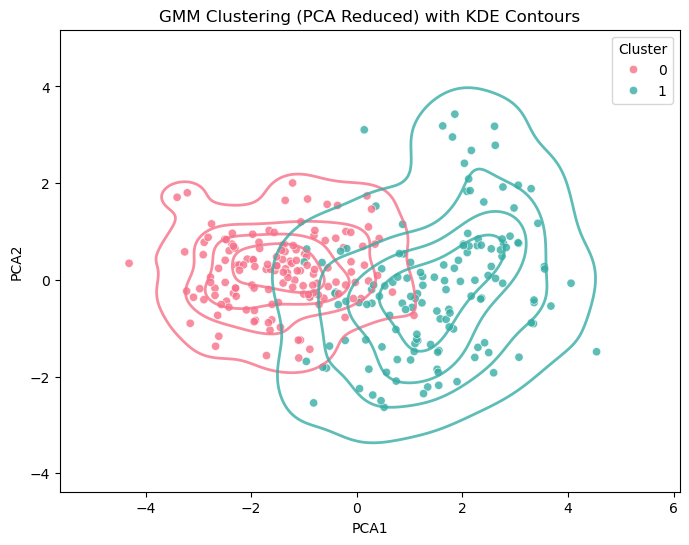

In [38]:
# Run EM algorithm using the function above with X
gmm_cluster_labels, gmm_model, gmm_silhouette1 = run_em_gmm(X, n_components=2)

# Get the predicted cluster lables and Silhouette score
print("Cluster Labels:", gmm_cluster_labels)
print(f"Silhouette Score: {gmm_silhouette1:.4f}")

# Visualize the clusters
visualize_gmm_clusters_with_kde(X, gmm_cluster_labels)

Cluster Labels: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
Silhouette Score: 0.3110


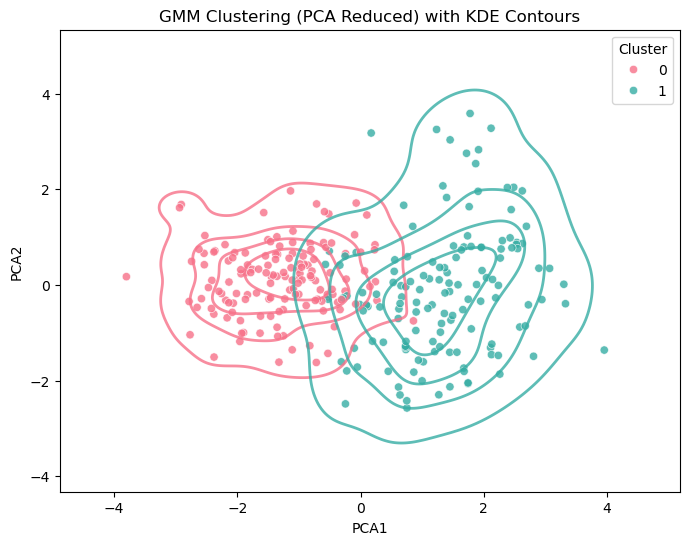

In [39]:
# Run EM algorithm using the function above with X2 without "Pelvic Incidence"
gmm_cluster_labels2, gmm_model2, gmm_silhouette2 = run_em_gmm(X2, n_components=2)

# Get the predicted cluster lables and Silhouette score
print("Cluster Labels:", gmm_cluster_labels2)
print(f"Silhouette Score: {gmm_silhouette2:.4f}")

# Visualize the clusters
visualize_gmm_clusters_with_kde(X2, gmm_cluster_labels2)

## Performance Evaluation

In [41]:
# Compute accuracy using the above defined function for EM algorithm
gmm_accuracy = compute_clustering_accuracy(true_labels_numeric, gmm_cluster_labels)
print(f"Clustering Accuracy: {gmm_accuracy:.4f}")

# Compute F1 and Recall scores using the above defined function for EM algorithm
gmm_class_report, gmm_f1_weighted_avg, gmm_recall_class0, gmm_recall_class1, gmm_recall_weighted_avg = compute_f1_recall(true_labels_numeric, gmm_cluster_labels)
print(f"Weighted F1-score: {gmm_f1_weighted_avg:.4f}")  # Weighted F1-score
print(f"Weighted Recall: {gmm_recall_weighted_avg:.4f}")  # Weighted Recall
print(f"Class1 Recall: {gmm_recall_class1:.4f}")  # Weighted Recall

Clustering Accuracy: 0.7430
Weighted F1-score: 0.7490
Weighted Recall: 0.7430
Class1 Recall: 0.6811


In [42]:
# Compute accuracy using the above defined function for EM algorithm without "Pelvic Incidence"
gmm_accuracy2 = compute_clustering_accuracy(true_labels_numeric, gmm_cluster_labels2)
print(f"Clustering Accuracy: {gmm_accuracy2:.4f}")

# Compute F1 and Recall scores using the above defined function for EM algorithm without "Pelvic Incidence"
gmm_class_report2, gmm_f1_weighted_avg2, gmm_recall_class02, gmm_recall_class12, gmm_recall_weighted_avg2 = compute_f1_recall(true_labels_numeric, gmm_cluster_labels2)
print(f"Weighted F1-score: {gmm_f1_weighted_avg2:.4f}")  # Weighted F1-score
print(f"Weighted Recall: {gmm_recall_weighted_avg2:.4f}")  # Weighted Recall
print(f"Class1 Recall: {gmm_recall_class12:.4f}")  # Weighted Recall

Clustering Accuracy: 0.7430
Weighted F1-score: 0.7490
Weighted Recall: 0.7430
Class1 Recall: 0.6811


## Grid-search the hyperparameters

In [44]:
# import random
import random

# define a function to grid search optimal parameters for GaussianMixture
def grid_search_gmm(X, true_labels):
    """
    Performs a comprehensive grid search for the best hyperparameters in GaussianMixture using F1-score.

    Parameters:
    - X: NumPy array, the feature matrix.
    - true_labels: Actual ground truth labels.

    Returns:
    - best_params: Dictionary containing the best hyperparameters and F1-score.
    """

    # Define the range of hyperparameters to test
    param_grid = {
        "n_components": [2],  # Number of clusters
        "covariance_type": ["full", "tied", "diag", "spherical"],  # Covariance matrix type
        "max_iter": [500, 1000],  # Maximum number of EM iterations
        "warm_start": [True, False],  # Whether to continue training from previous fit
        "tol": [1e-4, 1e-3],  # Convergence tolerance
        "init_params": ["kmeans", "random"],  # Initialization method
        "reg_covar": [1e-6, 1e-4, 1e-3],  # Regularization for covariance matrix
        "n_init": [10, 20]  # Number of initializations
    }

    # Generate all possible combinations of hyperparameters
    param_combinations = list(product(*param_grid.values()))

    best_score = -1
    best_params = {}

    # Perform grid search
    for params in param_combinations:
        # Unpack the parameter combination
        n_components, cov_type, max_iter, warm_start, tol, init_params, reg_covar, n_init = params

        # Initialize and fit GMM model
        gmm = GaussianMixture(
            n_components=n_components,
            covariance_type=cov_type,
            random_state=42,
            max_iter=max_iter,
            warm_start=warm_start,
            tol=tol,
            init_params=init_params,
            reg_covar=reg_covar,
            n_init=n_init
        )
        
        gmm.fit(X)
        cluster_labels = gmm.predict(X)

        # Compute the F1-score
        class_report, f1_weighted_avg, recall_class0, recall_class1, recall_weighted_avg = compute_f1_recall(true_labels, cluster_labels)

        # Update the best parameters if the current F1-score is better
        if f1_weighted_avg > best_score:
            best_score = f1_weighted_avg
            best_params = {
                "n_components": n_components,
                "covariance_type": cov_type,
                "max_iter": max_iter,
                "warm_start": warm_start,
                "tol": tol,
                "init_params": init_params,
                "reg_covar": reg_covar,
                "n_init": n_init,
                "f1_score": f1_weighted_avg
            }

    return best_params

In [45]:
# Run hyperparameter tuning of gmm using the above function with X against true labels
best_gmm_params = grid_search_gmm(X, true_labels_numeric)

# Print best parameters
print("\nBest Hyperparameters for GMM:")
best_gmm_params


Best Hyperparameters for GMM:


{'n_components': 2,
 'covariance_type': 'tied',
 'max_iter': 500,
 'warm_start': True,
 'tol': 0.0001,
 'init_params': 'kmeans',
 'reg_covar': 0.001,
 'n_init': 10,
 'f1_score': 0.7489627222021588}

In [46]:
# Run hyperparameter tuning of gmm using the above function with X2 against true labels (w/o "Pelvic Incidence")
best_gmm_params2 = grid_search_gmm(X2, true_labels_numeric)

# Print best parameters
print("\nBest Hyperparameters for GMM:")
best_gmm_params2


Best Hyperparameters for GMM:


{'n_components': 2,
 'covariance_type': 'tied',
 'max_iter': 500,
 'warm_start': True,
 'tol': 0.0001,
 'init_params': 'kmeans',
 'reg_covar': 1e-06,
 'n_init': 10,
 'f1_score': 0.7489627222021588}

In [47]:
# define a function to generate a comparison matirx among the method performance
def compare_clustering_results():
    """
    Compares Kernel K-Means and GMM (EM Algorithm) in terms of F1 and Recall scores.
    
    Parameters:
    - None
    
    Returns:
    - results_df: Pandas DataFrame containing comparison results
    """
    # Evaluate Kernel K-Means
    kmeans_acc = accuracy
    kmeans_silhouette = silhouette
    f1 = f1_weighted_avg
    recall1 = recall_weighted_avg
    recall_class_1 = recall_class1

    # Evaluate Kernel K-Means (without Pelvic Incidence)
    kmeans_acc2 = accuracy2
    kmeans_silhouette2 = silhouette2
    f12 = f1_weighted_avg2
    recall2 = recall_weighted_avg2
    recall_class_12 =recall_class12

    # Evaluate GMM (EM Algorithm)
    gmm_acc =  gmm_accuracy
    gmm_silhouette = gmm_silhouette1
    gmm_f1 = gmm_f1_weighted_avg
    gmm_recall = gmm_recall_weighted_avg
    gmm_recall_class_1 = gmm_recall_class1

    # Evaluate GMM (EM Algorithm) (without Pelvic Incidence)
    gmm_acc2 =  gmm_accuracy2
    gmm_silhouette_2 = gmm_silhouette2
    gmm_f12 = gmm_f1_weighted_avg2
    gmm_recall2 = gmm_recall_weighted_avg2
    gmm_recall_class_12 = gmm_recall_class12

    # Create summary table
    results = {
        "Method": ["Kernel K-Means", 
                   "Kernel K-Means (w/o Pelvic Incidence)", 
                   "GMM (EM Algorithm)", 
                   "GMM (EM Algorithm) (w/o Pelvic Incidence)"],
        "Accuracy": [kmeans_acc, kmeans_acc2, gmm_acc, gmm_acc2],
        "Silhouette Score": [kmeans_silhouette,  kmeans_silhouette2, gmm_silhouette, gmm_silhouette_2],
        "F1 Score": [f1,  f12, gmm_f1, gmm_f12],
        "Recall (Weighted)": [recall1,  recall2, gmm_recall, gmm_recall2],
        "Recall Class1": [recall_class_1,  recall_class_12, gmm_recall_class_1, gmm_recall_class_12]
        
    }

    results_df = pd.DataFrame(results)
    
    return results_df

In [48]:
# print the result table
compare_clustering_results()

,Method,Accuracy,Silhouette Score,F1 Score,Recall (Weighted),Recall Class1
0,Kernel K-Means,0.711268,0.342186,0.716016,0.711268,0.600000
1,Kernel K-Means (w/o Pelvic Incidence),0.735915,0.318280,0.741179,0.735915,0.637838
2,GMM (EM Algorithm),0.742958,0.319977,0.748963,0.742958,0.681081
3,GMM (EM Algorithm) (w/o Pelvic Incidence),0.742958,0.311003,0.748963,0.742958,0.681081
